In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import ScoringGeneratedImages
from PIL import Image
import numpy as np
from tqdm import tqdm_notebook
import pandas as pd
import pickle

Using TensorFlow backend.
/home/mshaikh2/anaconda3/envs/pytorch-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mshaikh2/anaconda3/envs/pytorch-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mshaikh2/anaconda3/envs/pytorch-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [19]:
def datagen(image_root_path,image_path_list,batch_size=32):
    counter = 0
    idx = 0
    img_list = []
    while True:
        try:
            p = os.path.join(image_root_path,image_path_list[idx])
            img = Image.open(p).convert('RGB')
            img = img.resize((299,299))
            img = np.asarray(img,'float32')
            if img.shape[-1] != 3:
                print(os.path.join(image_root_path,image_path_list[idx]),':',img.shape)
            else:
                img_list.append(img)
            counter+=1
            idx+=1
            if counter==batch_size:
                yield np.array(img_list)
                counter=0
                img_list = []
            if idx==len(image_path_list):
                yield np.array(img_list)
                counter,idx=0
                img_list = []
                break
        except Exception as ex:            
            idx+=1
            print(p,'\n',ex)
            pass

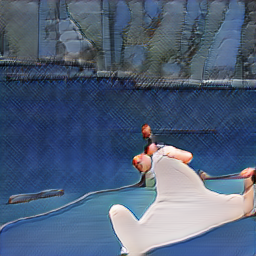

In [37]:
img = Image.open('../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_108/valid/single/COCO_val2014_000000459265_s-1.png')
img

In [4]:
# img.shape

In [5]:
# from matplotlib import pyplot as plt
# plt.imshow(img)

In [50]:
filename = '../data/coco/data_dic.pickle'

with open(filename , 'rb') as f:
    data_dic = pickle.load(f)

In [51]:
data_dic

{'COCO_val2014_000000428612': [array([[  10,  191,  249,   23,   24,   10,  408,   34,   10,  879,  379,
            34,   90,  529],
         [  78,   90,  529,   19,   23,   24,   10,  408,    7,   10,  259,
           879,    0,    0],
         [  10,  259,  879,   58,   88,  795,  529,   11,   10,  317,  249,
             0,    0,    0],
         [  10,  598,  879,   34,  529,   19,   11,   10, 4371,    0,    0,
             0,    0,    0],
         [  10,   96,   21,  529,  115,  793,    7,   10,  879,    0,    0,
             0,    0,    0]]),
  array([14, 12, 11,  9,  9]),
  array([2, 3, 4, 1, 0])],
 'COCO_val2014_000000520933': [array([[  10,  518,   58,   59,   53,  134,  112,   11,   10,  106, 1810],
         [  10,   59,  518,   58,  317,  134,  115,  112,   11,   10,  106],
         [  10,  518,   58,   59,  134,  112,   11,  131,   21,   10,  106],
         [  10,   59,   58,  518,  134,  115,  112,   11,   10,  106,    0],
         [  10, 2537, 1779,  134,  112,   11,   1

In [7]:
m,s = val_imgs_stats['mean'],val_imgs_stats['std']
m.shape,s.shape

((2048,), (2048, 2048))

In [8]:
# IS = ScoringGeneratedImages.inceptionScore()
FID = ScoringGeneratedImages.frechetInceptionDistance(mu1=m,sigma1=s)

In [9]:
FID.mu1.shape

(2048,)

In [10]:
# image_root_path = '../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_90/valid/single/'
# image_path_list = os.listdir(image_root_path)
# dg = datagen(image_root_path,image_path_list,batch_size=batch_size)
batch_size = 1024

In [11]:
# np.shape(next(dg))
# 'cfg/coco_attn2.yml'
df = pd.read_csv('../plots/IMG_TEXT_TXFMR_COCO_FID_Results_0.csv')
dont_run_epochs = df['epoch'].values
dont_run_epochs

array([52, 56,  0, 74, 76])

In [49]:
# orig_val_root_dir = '../data/coco/images/'
with open('../data/coco/val2014_text/COCO_val2014_000000024924.txt') as f:
    print(f.read().split('\n'))

['A bathroom scene with a bathtub and a sink.', 'A large yellow walled bathroom with white curtains', 'A bathroom with marble bath tub and sink.', 'A bathroom view shows a white shower curtain.', 'A hotel bathroom has towels as well as a shower, mirror, and scale.', '']


In [13]:
# o_list = os.listdir(orig_val_root_dir)
# val_img_list=[]
# for k in o_list:
#     if 'val' in k:
#         val_img_list.append(k)

In [14]:
# dg = datagen(orig_val_root_dir,val_img_list,batch_size=batch_size)
# val_images = next(dg)
# val_images.shape


In [15]:
# val_images[0].min(),val_images[0].max()

In [16]:
# m,s = FID.get_real_img_stats(val_images)

In [17]:
# val_imgs_stats = {
#     'mean':m,
#     'std':s
# }

In [20]:
batch_size=1024

thedir = '../output/coco_glu-gan2_2020_10_13_23_16_32/Model/'
fid = 0.0
epoch = []
fids = []
for x in tqdm_notebook(os.listdir(thedir)):
    root_path = os.path.join(thedir,x)
#     print(root_path)
    fid=0.0
    if os.path.isdir(root_path):
        e = int(root_path.split('_')[-1].replace('/',''))
        if e not in dont_run_epochs:
            epoch.append(e)
    #         score,std=0.0,0.0
            image_root_path = os.path.join(root_path,'valid/single/')
            print(image_root_path)
            image_path_list = os.listdir(image_root_path)
            dg = datagen(image_root_path,image_path_list,batch_size=batch_size)
            counter=0
            for x in tqdm_notebook(range((40460//batch_size)+1),leave=False):
                images = next(dg)
    #             print(images.min(),images.max())
                fid += FID.calculate_fid(images2=images,do_prepocess=True)
                counter+=1
            fid/=counter
            fids.append(fid)
#             print(is_mean,is_std)
#         break

../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_90/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_90/valid/single/COCO_val2014_000000433156_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_90/valid/single/COCO_val2014_000000453283_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_78/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_120/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_94/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_40/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_22/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_114/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_28/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_106/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_68/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_80/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_104/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_84/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_84/valid/single/COCO_val2014_000000091488_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_112/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_100/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_88/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_82/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_24/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/COCO_val2014_000000125944_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/COCO_val2014_000000254119_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/COCO_val2014_000000242679_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/COCO_val2014_000000410554_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/COCO_val2014_000000113736_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_54/valid/single/COCO_val2014_000000045729_s-1.png 
 unrecognized data stream content

../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_102/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_64/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_36/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_70/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_116/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_116/valid/single/COCO_val2014_000000375490_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_116/valid/single/COCO_val2014_000000434915_s-1.png 
 broken data stream when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_86/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_48/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_92/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_92/valid/single/COCO_val2014_000000268435_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_92/valid/single/COCO_val2014_000000477820_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_92/valid/single/COCO_val2014_000000128324_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_118/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_118/valid/single/COCO_val2014_000000216369_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_118/valid/single/COCO_val2014_000000129706_s-1.png 
 unrecognized data stream contents when reading image file
../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_34/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_96/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_72/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_58/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_10/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_50/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_110/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_46/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_38/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_44/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_32/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_30/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_60/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_26/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_20/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_108/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_66/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_42/valid/single/


../output/coco_glu-gan2_2020_10_13_23_16_32/Model/netG_epoch_62/valid/single/


In [22]:
fids

[85.74090131441758,
 82.94360567933892,
 195.11151385584589,
 79.04514113756586,
 78.79008015500902]

In [21]:
df = pd.DataFrame()

In [22]:
df['epoch'] = epoch
df['fid'] = fids

In [23]:
df.to_csv('../plots/IMG_TEXT_TXFMR_COCO_FID_Results_1.csv',index=False)

In [ ]:
df

In [24]:
p0_df = pd.read_csv('../plots/IMG_TEXT_TXFMR_COCO_FID_Results_0.csv')
p1_df = pd.read_csv('../plots/IMG_TEXT_TXFMR_COCO_FID_Results_1.csv')

df = pd.concat([p1_df,p0_df])

In [25]:
df = df.astype({"epoch": int})

In [29]:
df = df.sort_values(by='epoch')
df.to_csv('../plots/IMG_TEXT_TXFMR_COCO_FID_Results.csv',index=False)

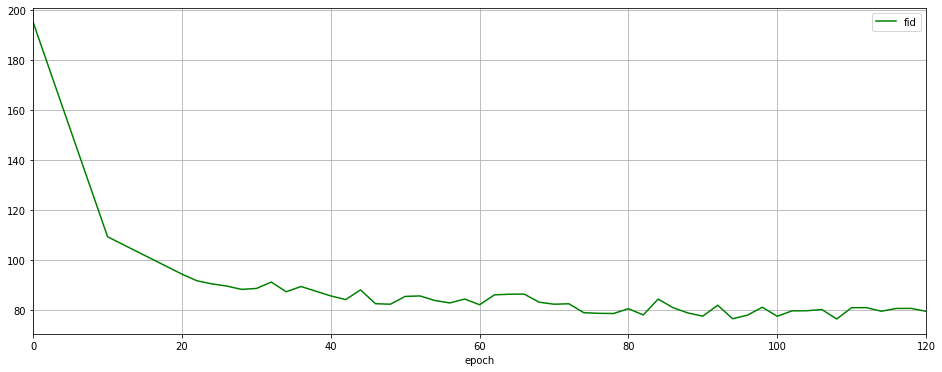

In [30]:
df.plot.line(x='epoch',y='fid',color='green',grid=True,figsize=(16,6))


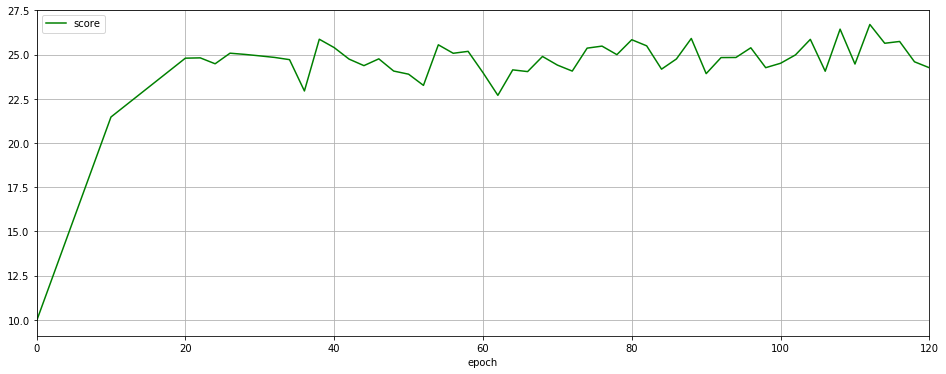

In [33]:
is_df = pd.read_csv('../plots/IMG_TEXT_TXFMR_COCO_IS_Results.csv')
is_df.plot.line(x='epoch',y='score',color='green',grid=True,figsize=(16,6))

In [35]:
df,is_df

(    epoch         fid
 2       0  195.111514
 33     10  109.400975
 43     20   94.449871
 5      22   91.809777
 17     24   90.574690
 42     26   89.698742
 7      28   88.365335
 40     30   88.733905
 39     32   91.281495
 29     34   87.413240
 22     36   89.513941
 37     38   87.625328
 4      40   85.748909
 46     42   84.286172
 38     44   88.158600
 36     46   82.642701
 26     48   82.433332
 34     50   85.545507
 0      52   85.740901
 18     54   83.907344
 1      56   82.943606
 32     58   84.509150
 41     60   82.226285
 47     62   86.180816
 21     64   86.426258
 45     66   86.472468
 9      68   83.242589
 23     70   82.432722
 31     72   82.607590
 3      74   79.045141
 4      76   78.790080
 1      78   78.709203
 10     80   80.622972
 16     82   78.145924
 12     84   84.489837
 25     86   81.042577
 15     88   78.936172
 0      90   77.655138
 27     92   82.029117
 3      94   76.627833
 30     96   78.052836
 19     98   81.219329
 14    100 